<a href="https://colab.research.google.com/github/flatlalejo1982/Phase-4-Project-Execution/blob/Johan_AQI/Phase_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Phase 4 Project Execution**

In [19]:
#Load core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**1.Data Preparation**

In [20]:
import pandas as pd

#Load Data

data = pd.read_csv("/content/airdata.csv", sep = ",")
data.head()

,date,Station code,Address,Latitude,Longitude,SO2,NO2,CO,O3,PM2.5,PM10
0,1/1/2017 0:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.059,1.2,0.0525,57,73
1,1/1/2017 1:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.058,1.2,0.0525,59,71
2,1/1/2017 2:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.056,1.2,0.0525,59,70
3,1/1/2017 3:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.056,1.2,0.0525,58,70
4,1/1/2017 4:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.03,0.051,1.2,0.0525,61,69


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155405 entries, 0 to 155404
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          155405 non-null  object 
 1   Station code  155405 non-null  int64  
 2   Address       155405 non-null  object 
 3   Latitude      155405 non-null  float64
 4   Longitude     155405 non-null  float64
 5   SO2           155405 non-null  float64
 6   NO2           155405 non-null  float64
 7   CO            155405 non-null  float64
 8   O3            155405 non-null  float64
 9   PM2.5         155405 non-null  int64  
 10  PM10          155405 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 13.0+ MB


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

**Calculation of the Air Quality Index (AQI) for various pollutants**




**Define the EPA ranges (in µg/m³ or ppm depending on the contaminant)**

In [22]:
#Create EPA range table
rangos = {
    "SO2": pd.DataFrame({
        'Bmin': [0, 36, 76, 186, 305, 605],
        'Bmax': [35, 75, 185, 304, 604, 1004],
        'Imin': [0, 51, 101, 151, 201, 301],
        'Imax': [50, 100, 150, 200, 300, 500],
        'Categoria': ['Good', 'Moderate', 'Harmful/sensitive Groups', 'Poor', 'Very Poor', 'Dangerous']
    }),
    "NO2": pd.DataFrame({
        'Bmin': [0, 54, 101, 361, 650, 1250],
        'Bmax': [53, 100, 360, 649, 1249, 2049],
        'Imin': [0, 51, 101, 151, 201, 301],
        'Imax': [50, 100, 150, 200, 300, 500],
        'Categoria': ['Good', 'Moderate', 'Harmful/sensitive Groups', 'Poor', 'Very Poor', 'Dangerous']
    }),
    "CO": pd.DataFrame({
        'Bmin': [0.0, 4.5, 9.5, 12.5, 15.5, 30.5],
        'Bmax': [4.4, 9.4, 12.4, 15.4, 30.4, 50.4],
        'Imin': [0, 51, 101, 151, 201, 301],
        'Imax': [50, 100, 150, 200, 300, 500],
        'Categoria': ['Good', 'Moderate', 'Harmful/sensitive Groups', 'Poor', 'Very Poor', 'Dangerous']
    }),
    "O3": pd.DataFrame({
        'Bmin': [0.000, 0.055, 0.071, 0.086, 0.106, 0.201],
        'Bmax': [0.054, 0.070, 0.085, 0.105, 0.200, 0.604],
        'Imin': [0, 51, 101, 151, 201, 301],
        'Imax': [50, 100, 150, 200, 300, 500],
        'Categoria': ['Good', 'Moderate', 'Harmful/sensitive Groups', 'Poor', 'Very Poor', 'Dangerous']
    }),
    "PM2.5": pd.DataFrame({
        'Bmin': [0.0, 12.1, 35.5, 55.5, 150.5, 250.5],
        'Bmax': [12.0, 35.4, 55.4, 150.4, 250.4, 500.4],
        'Imin': [0, 51, 101, 151, 201, 301],
        'Imax': [50, 100, 150, 200, 300, 500],
        'Categoria': ['Good', 'Moderate', 'Harmful/sensitive Groups', 'Poor', 'Very Poor', 'Dangerous']
    }),
    "PM10": pd.DataFrame({
        'Bmin': [0, 55, 155, 255, 355, 425],
        'Bmax': [54, 154, 254, 354, 424, 604],
        'Imin': [0, 51, 101, 151, 201, 301],
        'Imax': [50, 100, 150, 200, 300, 500],
        'Categoria': ['Good', 'Moderate', 'Harmful/sensitive Groups', 'Poor', 'Very Poor', 'Dangerous']
    }),
}

def calcular_aqi(Cp, contaminante):
    tabla = rangos[contaminante]
    for _, r in tabla.iterrows():
        if r.Bmin <= Cp <= r.Bmax:
            AQI = ((r.Imax - r.Imin) / (r.Bmax - r.Bmin)) * (Cp - r.Bmin) + r.Imin
            return round(AQI, 1), r.Categoria
    return None, "Fuera de rango"


In [23]:
# Calcular AQI para cada particula contaminante registrada
for contaminante in ["SO2", "NO2", "CO", "O3", "PM2.5", "PM10"]:
    data[f"AQI_{contaminante}"], data[f"Cat_{contaminante}"] = zip(*data[contaminante].apply(lambda x: calcular_aqi(x, contaminante)))

In [24]:
#  AQI total y contaminante dominante
aqi_cols = [f"AQI_{c}" for c in ["SO2", "NO2", "CO", "O3", "PM2.5", "PM10"]]
data["AQI_Total"] = data[aqi_cols].max(axis=1)
data["Dominante"] = data[aqi_cols].idxmax(axis=1).str.replace("AQI_", "")

In [25]:
# --- FUNCIÓN PARA CATEGORIZAR EL AQI TOTAL ---
def categoria_aqi_total(aqi):
    if 0 <= aqi <= 50:
        return "Good"
    elif 51 <= aqi <= 100:
        return "Moderate"
    elif 101 <= aqi <= 150:
        return "Harmful/sensitive Groups"
    elif 151 <= aqi <= 200:
        return "Poor"
    elif 201 <= aqi <= 300:
        return "Very Poor"
    elif 301 <= aqi <= 500:
        return "Dangerous"
    else:
        return "Fuera de rango"

In [26]:
# --- AÑADIR CATEGORÍA DEL AQI TOTAL ---
data["Categoria_Total"] = data["AQI_Total"].apply(categoria_aqi_total)

In [27]:
# Mostrar los resultados
print("\n Resultados del cálculo del AQI:")
display(data.head())


 Resultados del cálculo del AQI:


,date,Station code,Address,Latitude,Longitude,SO2,NO2,CO,O3,PM2.5,...,Cat_CO,AQI_O3,Cat_O3,AQI_PM2.5,Cat_PM2.5,AQI_PM10,Cat_PM10,AQI_Total,Dominante,Categoria_Total
0,1/1/2017 0:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.059,1.2,0.0525,57,...,Good,48.6,Good,151.8,Poor,59.9,Moderate,151.8,PM2.5,Poor
1,1/1/2017 1:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.058,1.2,0.0525,59,...,Good,48.6,Good,152.8,Poor,58.9,Moderate,152.8,PM2.5,Poor
2,1/1/2017 2:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.056,1.2,0.0525,59,...,Good,48.6,Good,152.8,Poor,58.4,Moderate,152.8,PM2.5,Poor
3,1/1/2017 3:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.056,1.2,0.0525,58,...,Good,48.6,Good,152.3,Poor,58.4,Moderate,152.3,PM2.5,Poor
4,1/1/2017 4:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.03,0.051,1.2,0.0525,61,...,Good,48.6,Good,153.8,Poor,57.9,Moderate,153.8,PM2.5,Poor


In [28]:
# Guardar en un nuevo archivo y descargar el archivo
data.to_csv("airdata_AQI_resultados.csv", index=False)
print("\n Archivo guardado como: airdata_AQI_resultados.csv")


 Archivo guardado como: airdata_AQI_resultados.csv


In [29]:
data.loc[:, 'SO2':].describe()

,SO2,NO2,CO,O3,PM2.5,PM10,AQI_SO2,AQI_NO2,AQI_CO,AQI_O3,AQI_PM2.5,AQI_PM10,AQI_Total
count,155405.000000,155405.000000,155405.000000,155405.000000,155405.000000,155405.000000,155405.000000,155405.000000,155405.000000,142162.000000,155405.000000,155405.000000,155405.000000
mean,0.040914,0.069994,3.320786,0.252405,60.506097,88.594588,0.057594,0.053532,37.729360,269.236002,146.271129,67.065316,275.436717
std,0.032468,0.052109,0.619453,0.191296,14.957956,27.368936,0.064461,0.069233,7.030477,132.113738,21.118301,14.522713,107.770128
min,0.010000,0.020000,1.000000,0.040000,30.000000,41.000000,0.000000,0.000000,11.400000,37.000000,88.600000,38.000000,88.600000
25%,0.030000,0.029000,3.300000,0.090000,54.000000,67.000000,0.000000,0.000000,37.500000,187.100000,146.600000,56.900000,161.100000
50%,0.040000,0.045000,3.400000,0.220000,62.000000,96.000000,0.100000,0.000000,38.600000,305.400000,154.400000,71.300000,289.500000
75%,0.050000,0.100000,3.600000,0.350000,70.000000,108.000000,0.100000,0.100000,40.900000,364.700000,158.500000,77.200000,359.800000
max,4.060000,0.248000,12.300000,3.680000,280.000000,348.000000,5.800000,0.200000,148.300000,498.000000,324.500000,197.000000,498.000000


Plot the AQI Numerical

Generating histograms for the following numerical columns: ['SO2', 'NO2', 'CO', 'O3', 'PM2.5', 'PM10', 'AQI_SO2', 'AQI_NO2', 'AQI_CO', 'AQI_O3', 'AQI_PM2.5', 'AQI_PM10', 'AQI_Total']


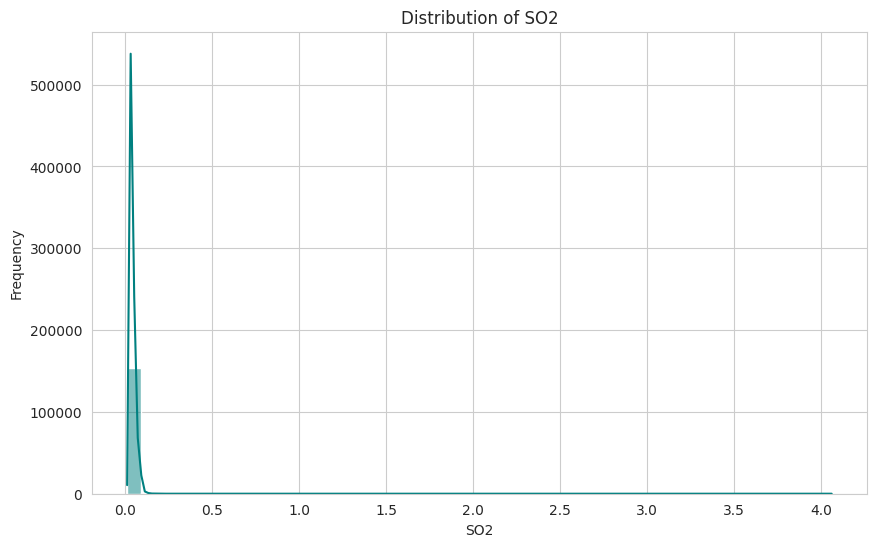

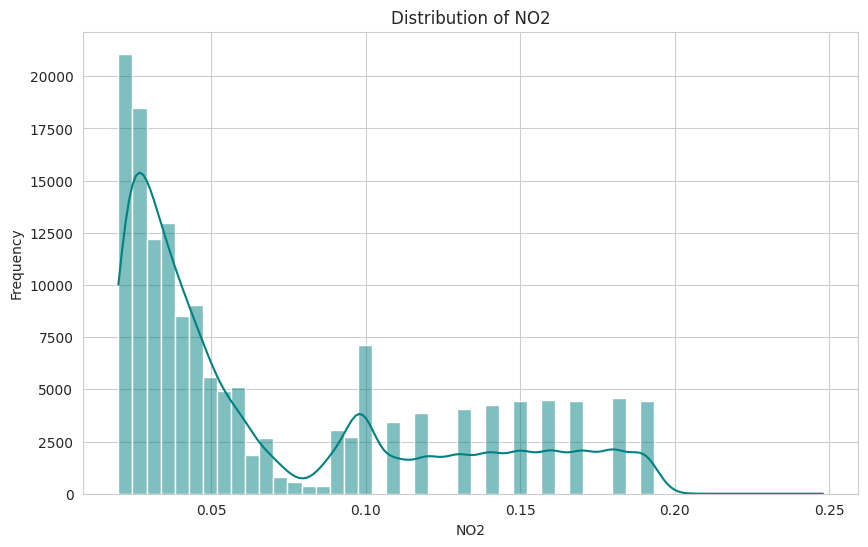

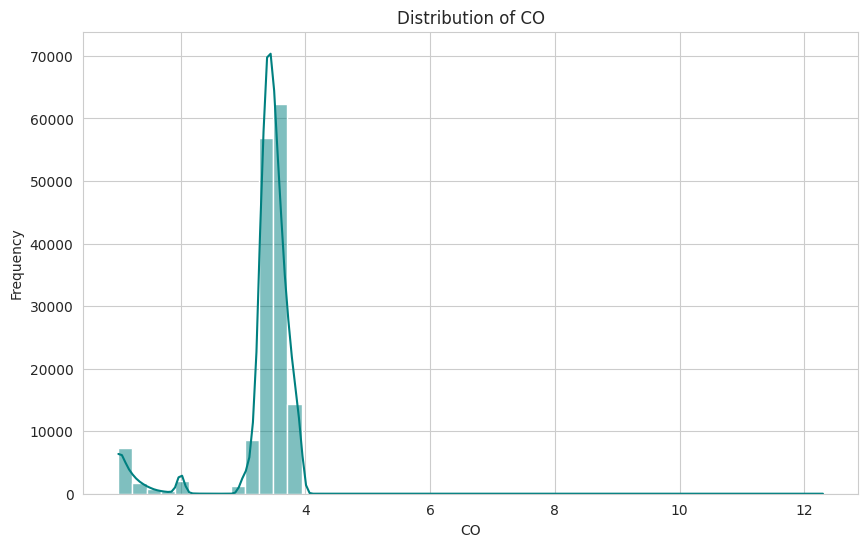

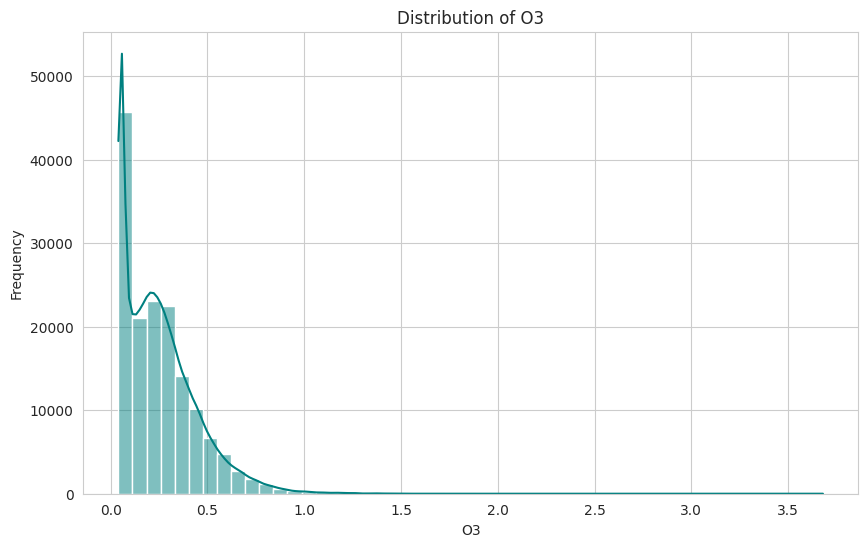

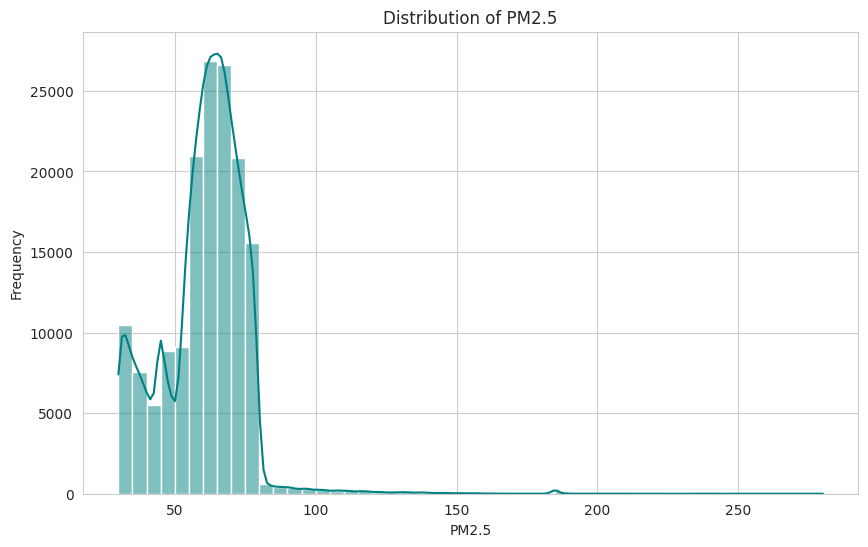

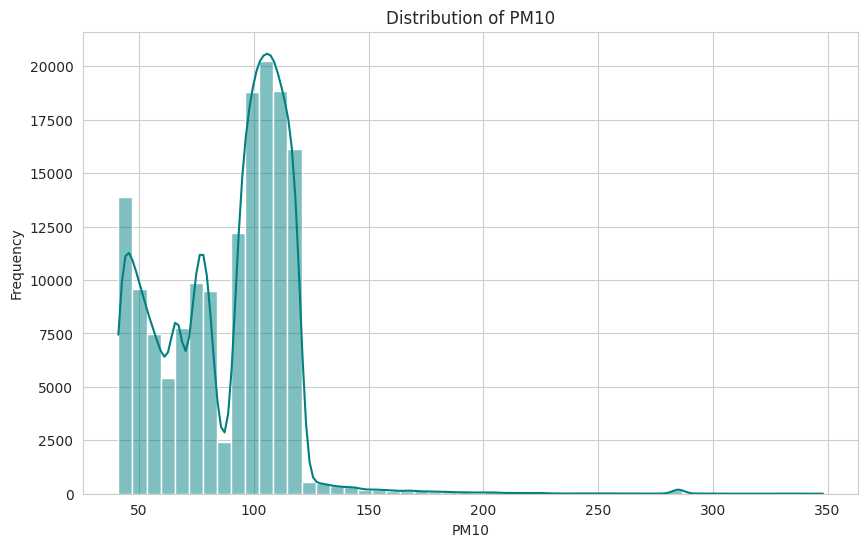

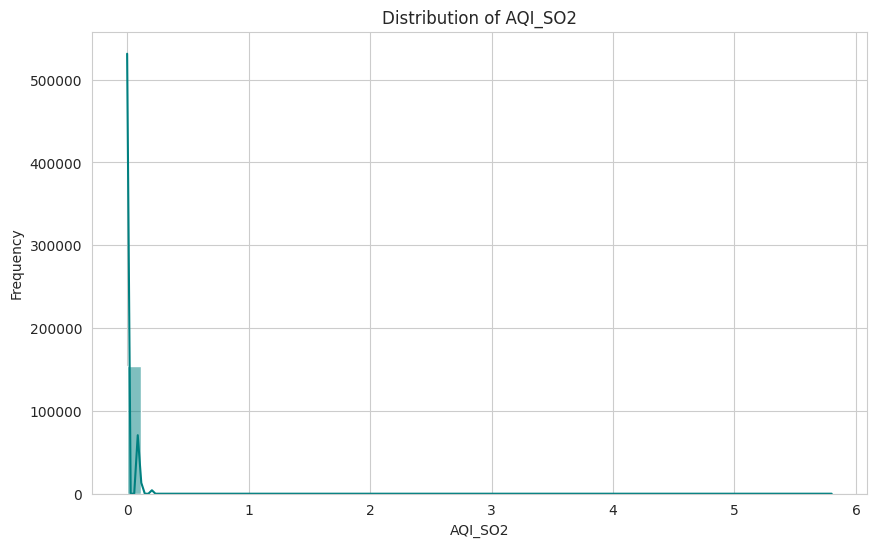

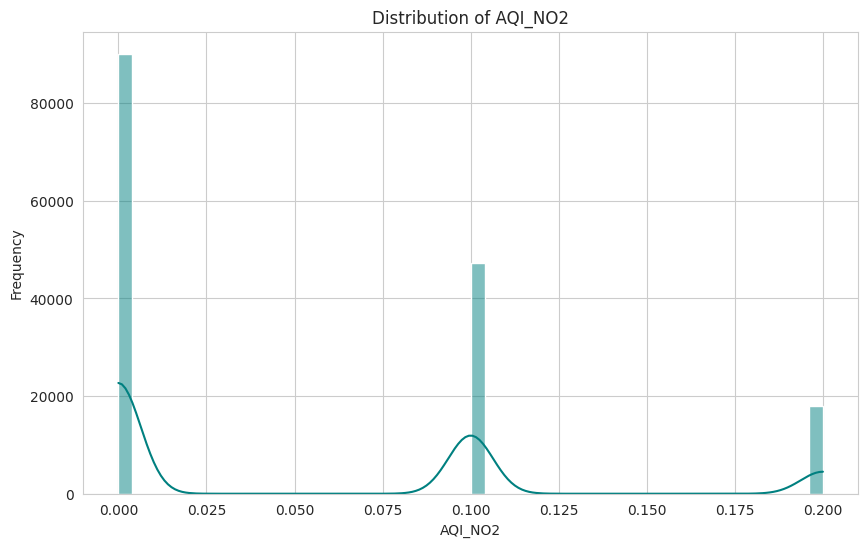

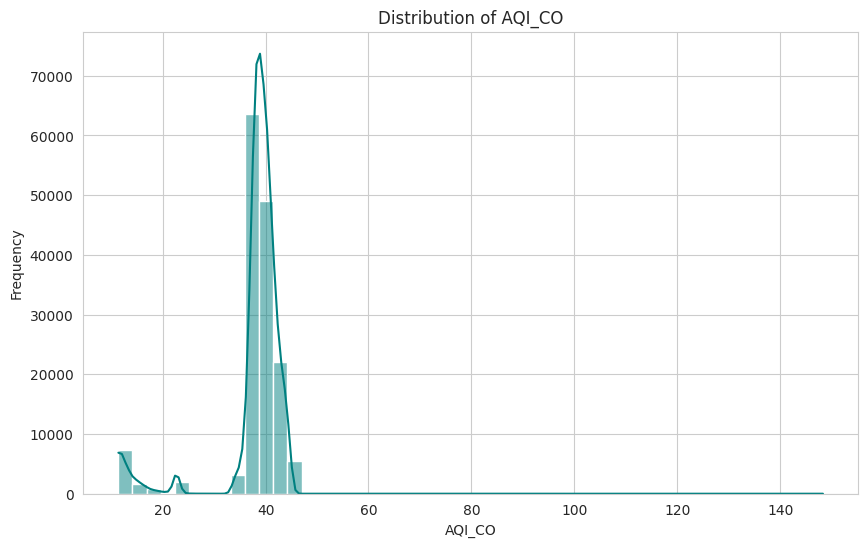

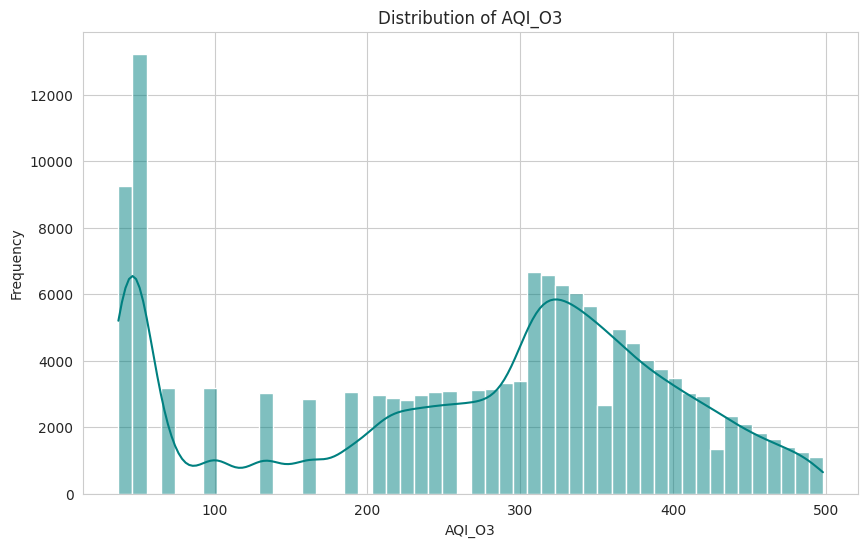

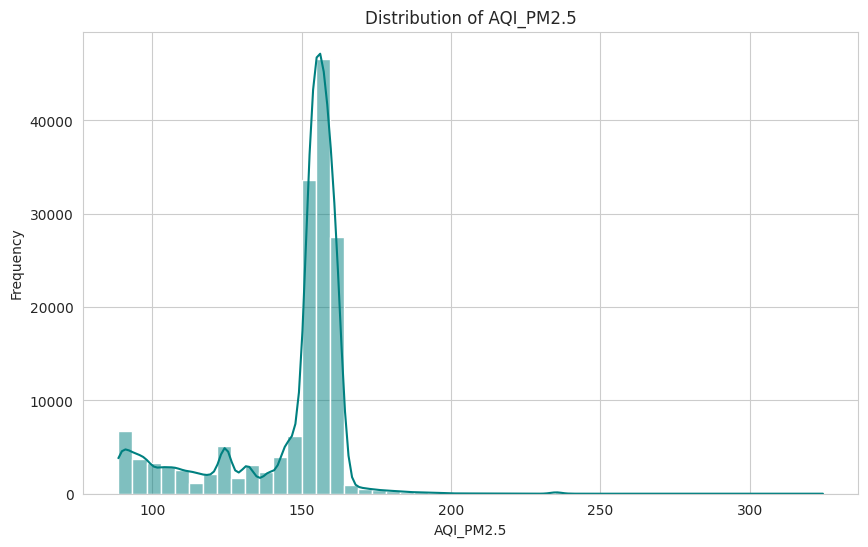

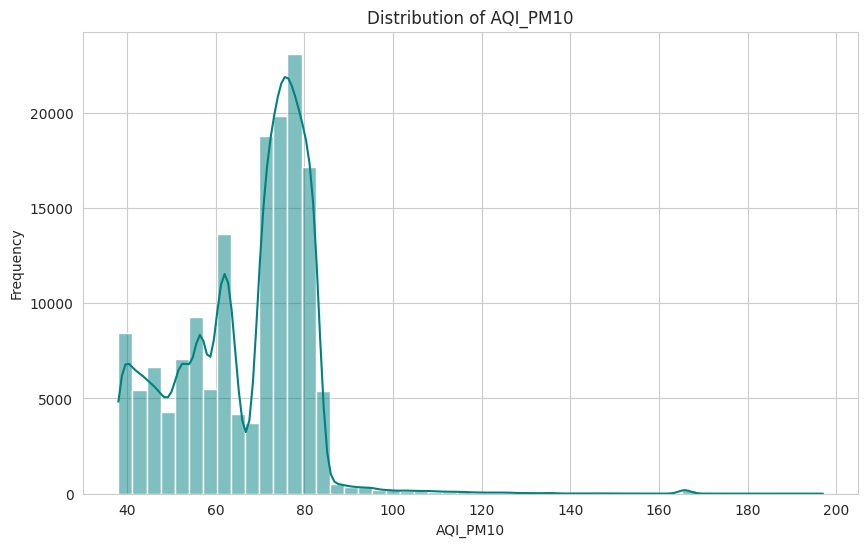

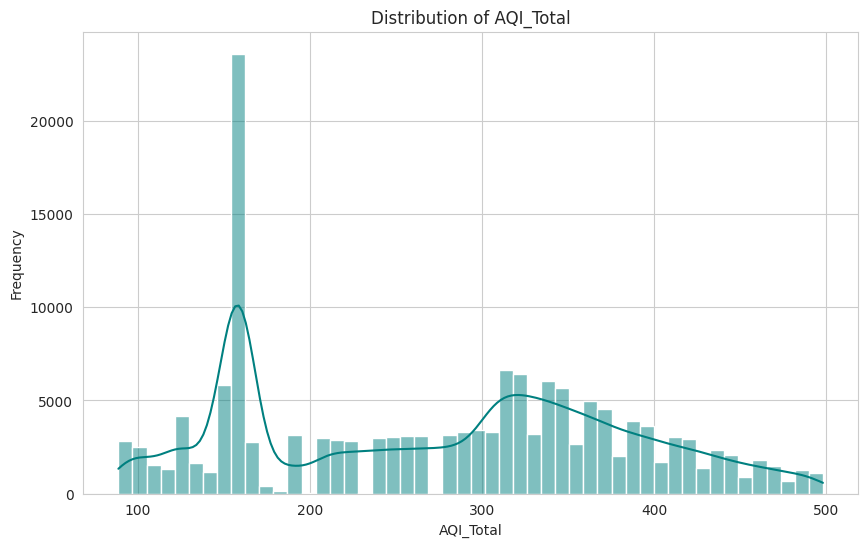

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Identify numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Columns to explicitly exclude
exclude_cols = ['Station code', 'Latitude', 'Longitude']

# Filter out the excluded columns
filtered_numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

print(f"Generating histograms for the following numerical columns: {filtered_numerical_cols}")

# Generate a histogram for each filtered numerical column
for col in filtered_numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=col, kde=True, bins=50, color='teal')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Building Linear Regression Models

We will now build a separate Linear Regression model for each AQI variable (dependent variable) using its corresponding pollutant concentration (independent variable). This will help us understand the linear relationship and predict AQI based on pollutant levels.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

dependent_vars = ['AQI_SO2', 'AQI_NO2', 'AQI_CO', 'AQI_O3', 'AQI_PM2.5', 'AQI_PM10']
independent_vars = ['SO2', 'NO2', 'CO', 'O3', 'PM2.5', 'PM10']

results = {}

for i in range(len(dependent_vars)):
    dep_var = dependent_vars[i]
    indep_var = independent_vars[i]
    print(f"\n--- Building Model for {dep_var} vs {indep_var} ---")

    # Select relevant columns and drop rows with NaN values for this specific model
    temp_df = data[[indep_var, dep_var]].dropna()

    if temp_df.empty:
        print(f"No data available for {dep_var} and {indep_var} after dropping NaNs. Skipping.")
        continue

    X = temp_df[[indep_var]]
    y = temp_df[dep_var]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store and print results
    results[dep_var] = {
        'independent_variable': indep_var,
        'coefficient': model.coef_[0],
        'intercept': model.intercept_,
        'mean_squared_error': mse,
        'root_mean_squared_error': rmse,
        'mean_absolute_error': mae,
        'r2_score': r2
    }

    print(f"Independent Variable: {indep_var}")
    print(f"Coefficient: {model.coef_[0]:.4f}")
    print(f"Intercept: {model.intercept_:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared: {r2:.4f}")

print("\n--- Summary of all Linear Regression Models ---")
for dep_var, res in results.items():
    print(f"\nModel for {dep_var} (Independent: {res['independent_variable']})")
    print(f"  Coefficient: {res['coefficient']:.4f}")
    print(f"  Intercept: {res['intercept']:.4f}")
    print(f"  MSE: {res['mean_squared_error']:.4f}")
    print(f"  RMSE: {res['root_mean_squared_error']:.4f}")
    print(f"  MAE: {res['mean_absolute_error']:.4f}")
    print(f"  R2 Score: {res['r2_score']:.4f}")


--- Building Model for AQI_SO2 vs SO2 ---
Independent Variable: SO2
Coefficient: 1.6261
Intercept: -0.0090
Mean Squared Error (MSE): 0.0013
Root Mean Squared Error (RMSE): 0.0356
Mean Absolute Error (MAE): 0.0336
R-squared: 0.5850

--- Building Model for AQI_NO2 vs NO2 ---
Independent Variable: NO2
Coefficient: 1.2406
Intercept: -0.0333
Mean Squared Error (MSE): 0.0006
Root Mean Squared Error (RMSE): 0.0247
Mean Absolute Error (MAE): 0.0181
R-squared: 0.8726

--- Building Model for AQI_CO vs CO ---
Independent Variable: CO
Coefficient: 11.3484
Intercept: 0.0437
Mean Squared Error (MSE): 0.0081
Root Mean Squared Error (RMSE): 0.0898
Mean Absolute Error (MAE): 0.0245
R-squared: 0.9998

--- Building Model for AQI_O3 vs O3 ---
Independent Variable: O3
Coefficient: 843.7497
Intercept: 75.2926
Mean Squared Error (MSE): 2111.6789
Root Mean Squared Error (RMSE): 45.9530
Mean Absolute Error (MAE): 40.7487
R-squared: 0.8803

--- Building Model for AQI_PM2.5 vs PM2.5 ---
Independent Variable: PM

Building Decission Tree Regressor Models

We will now build a separate Decission Tree Regression model for each AQI variable (dependent variable) using its corresponding pollutant concentration (independent variable). This will help us understand the linear relationship and predict AQI based on pollutant levels.

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

dependent_vars = ['AQI_SO2', 'AQI_NO2', 'AQI_CO', 'AQI_O3', 'AQI_PM2.5', 'AQI_PM10']
independent_vars = ['SO2', 'NO2', 'CO', 'O3', 'PM2.5', 'PM10']

dtr_results = {}

print("### Building Decision Tree Regressor Models ###")

for i in range(len(dependent_vars)):
    dep_var = dependent_vars[i]
    indep_var = independent_vars[i]
    print(f"\n--- Building DTR Model for {dep_var} vs {indep_var} ---")

    # Select relevant columns and drop rows with NaN values for this specific model
    temp_df = data[[indep_var, dep_var]].dropna()

    if temp_df.empty:
        print(f"No data available for {dep_var} and {indep_var} after dropping NaNs. Skipping.")
        continue

    X = temp_df[[indep_var]]
    y = temp_df[dep_var]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Decision Tree Regressor model
    dtr_model = DecisionTreeRegressor(random_state=42)
    dtr_model.fit(X_train, y_train)

    # Make predictions
    y_pred = dtr_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store and print results
    dtr_results[dep_var] = {
        'independent_variable': indep_var,
        'mean_squared_error': mse,
        'root_mean_squared_error': rmse,
        'mean_absolute_error': mae,
        'r2_score': r2
    }

    print(f"Independent Variable: {indep_var}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared: {r2:.4f}")

print("\n--- Summary of all Decision Tree Regressor Models ---")
for dep_var, res in dtr_results.items():
    print(f"\nModel for {dep_var} (Independent: {res['independent_variable']})")
    print(f"  MSE: {res['mean_squared_error']:.4f}")
    print(f"  RMSE: {res['root_mean_squared_error']:.4f}")
    print(f"  MAE: {res['mean_absolute_error']:.4f}")
    print(f"  R2 Score: {res['r2_score']:.4f}")

### Building Decision Tree Regressor Models ###

--- Building DTR Model for AQI_SO2 vs SO2 ---
Independent Variable: SO2
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0006
Mean Absolute Error (MAE): 0.0000
R-squared: 0.9999

--- Building DTR Model for AQI_NO2 vs NO2 ---
Independent Variable: NO2
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
Mean Absolute Error (MAE): 0.0000
R-squared: 1.0000

--- Building DTR Model for AQI_CO vs CO ---
Independent Variable: CO
Mean Squared Error (MSE): 0.0030
Root Mean Squared Error (RMSE): 0.0544
Mean Absolute Error (MAE): 0.0005
R-squared: 0.9999

--- Building DTR Model for AQI_O3 vs O3 ---
Independent Variable: O3
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
Mean Absolute Error (MAE): 0.0000
R-squared: 1.0000

--- Building DTR Model for AQI_PM2.5 vs PM2.5 ---
Independent Variable: PM2.5
Mean Squared Error (MSE): 0.0016
Root Mean Squared Error (RMSE): 0.0404
Mean Absolute Error

Building Decission Tree Regressor Models Plot



### Plotting Decision Tree Regressor Predictions ###

Generating plot for AQI_SO2 vs SO2


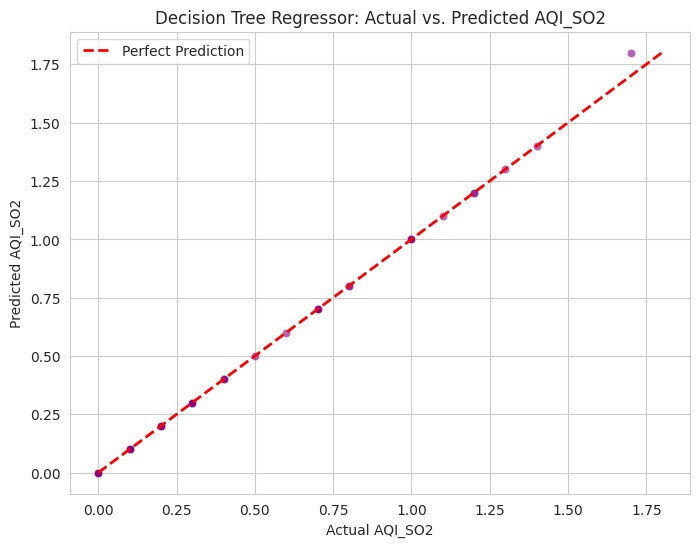


Generating plot for AQI_NO2 vs NO2


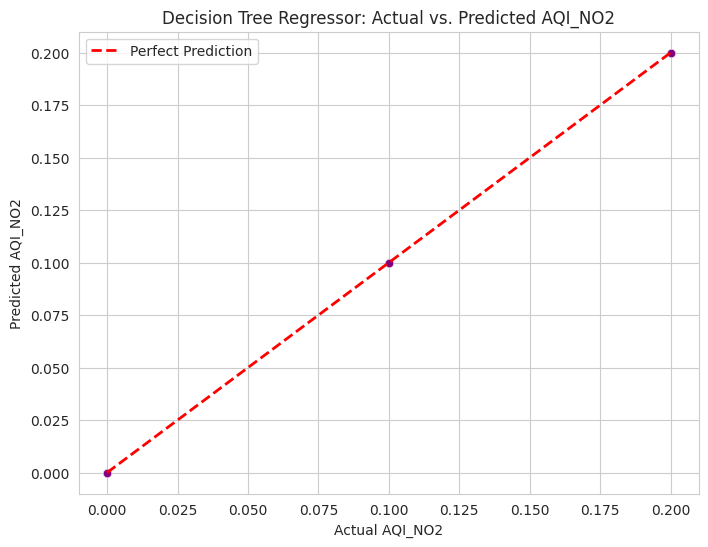


Generating plot for AQI_CO vs CO


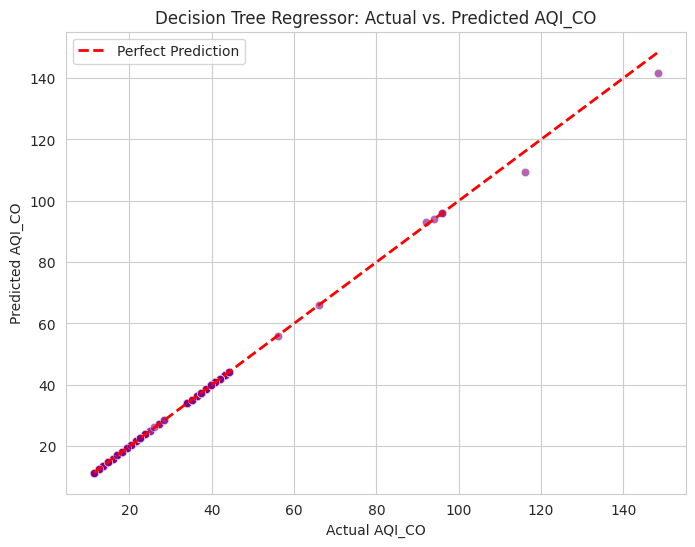


Generating plot for AQI_O3 vs O3


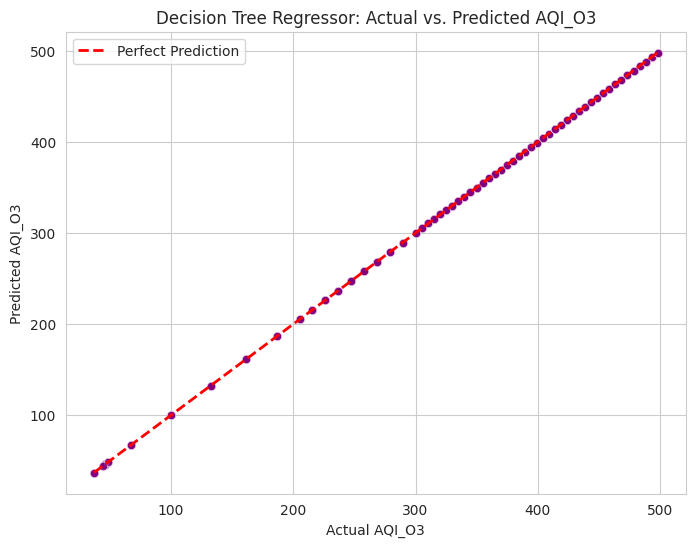


Generating plot for AQI_PM2.5 vs PM2.5


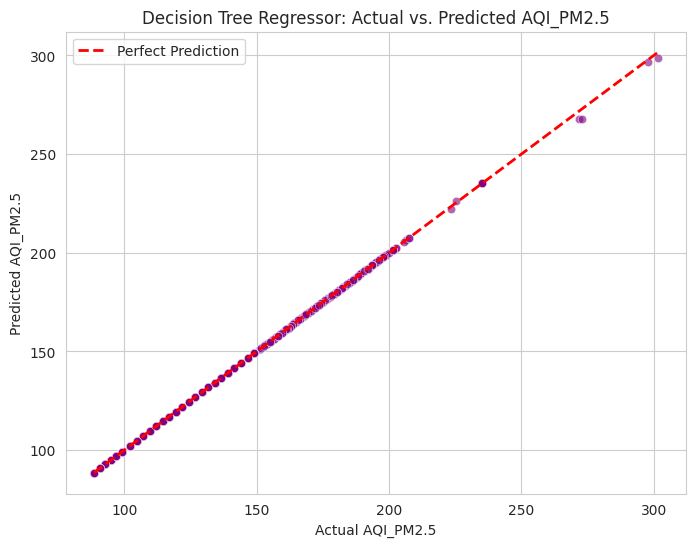


Generating plot for AQI_PM10 vs PM10


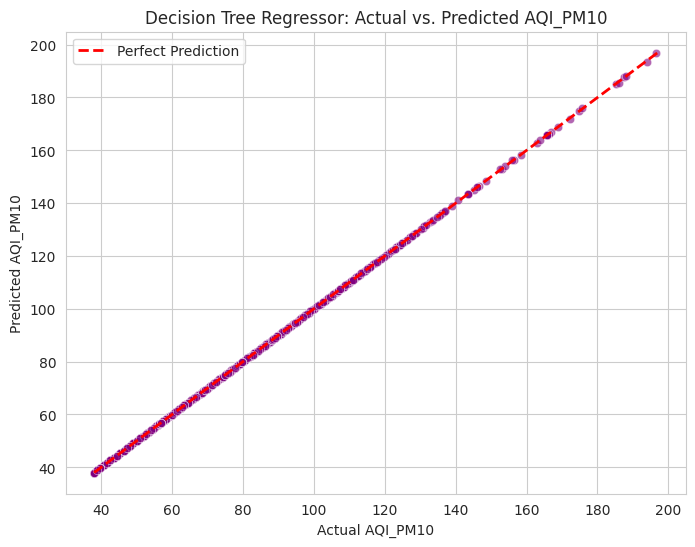

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import numpy as np

sns.set_style("whitegrid")

dependent_vars = ['AQI_SO2', 'AQI_NO2', 'AQI_CO', 'AQI_O3', 'AQI_PM2.5', 'AQI_PM10']
independent_vars = ['SO2', 'NO2', 'CO', 'O3', 'PM2.5', 'PM10']

print("### Plotting Decision Tree Regressor Predictions ###")

for i in range(len(dependent_vars)):
    dep_var = dependent_vars[i]
    indep_var = independent_vars[i]

    print(f"\nGenerating plot for {dep_var} vs {indep_var}")

    # Select relevant columns and drop rows with NaN values for this specific model
    temp_df = data[[indep_var, dep_var]].dropna()

    if temp_df.empty:
        print(f"No data available for {dep_var} and {indep_var} after dropping NaNs. Skipping plot.")
        continue

    X = temp_df[[indep_var]]
    y = temp_df[dep_var]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Decision Tree Regressor model
    # Using the same random_state as in the evaluation for consistency
    dtr_model = DecisionTreeRegressor(random_state=42)
    dtr_model.fit(X_train, y_train)

    # Make predictions
    y_pred = dtr_model.predict(X_test)

    # Create scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='purple')

    # Add a perfect prediction line (y=x)
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

    plt.title(f'Decision Tree Regressor: Actual vs. Predicted {dep_var}')
    plt.xlabel(f'Actual {dep_var}')
    plt.ylabel(f'Predicted {dep_var}')
    plt.legend()
    plt.grid(True)
    plt.show()

Building Random Forest Regressor Models

We will now build a separate Random Forest Regressor model for each AQI variable (dependent variable) using its corresponding pollutant concentration (independent variable). This will help us understand the linear relationship and predict AQI based on pollutant levels.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

dependent_vars = ['AQI_SO2', 'AQI_NO2', 'AQI_CO', 'AQI_O3', 'AQI_PM2.5', 'AQI_PM10']
independent_vars = ['SO2', 'NO2', 'CO', 'O3', 'PM2.5', 'PM10']

rfr_results = {}

print("### Building Random Forest Regressor Models ###")

for i in range(len(dependent_vars)):
    dep_var = dependent_vars[i]
    indep_var = independent_vars[i]
    print(f"\n--- Building RFR Model for {dep_var} vs {indep_var} ---")

    # Select relevant columns and drop rows with NaN values for this specific model
    temp_df = data[[indep_var, dep_var]].dropna()

    if temp_df.empty:
        print(f"No data available for {dep_var} and {indep_var} after dropping NaNs. Skipping.")
        continue

    X = temp_df[[indep_var]]
    y = temp_df[dep_var]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Random Forest Regressor model
    # Using a fixed random_state for reproducibility
    rfr_model = RandomForestRegressor(random_state=42)
    rfr_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rfr_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store and print results
    rfr_results[dep_var] = {
        'independent_variable': indep_var,
        'mean_squared_error': mse,
        'root_mean_squared_error': rmse,
        'mean_absolute_error': mae,
        'r2_score': r2
    }

    print(f"Independent Variable: {indep_var}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared: {r2:.4f}")

print("\n--- Summary of all Random Forest Regressor Models ---")
for dep_var, res in rfr_results.items():
    print(f"\nModel for {dep_var} (Independent: {res['independent_variable']})")
    print(f"  MSE: {res['mean_squared_error']:.4f}")
    print(f"  RMSE: {res['root_mean_squared_error']:.4f}")
    print(f"  MAE: {res['mean_absolute_error']:.4f}")
    print(f"  R2 Score: {res['r2_score']:.4f}")

### Building Random Forest Regressor Models ###

--- Building RFR Model for AQI_SO2 vs SO2 ---
Independent Variable: SO2
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0004
Mean Absolute Error (MAE): 0.0000
R-squared: 1.0000

--- Building RFR Model for AQI_NO2 vs NO2 ---
Independent Variable: NO2
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
Mean Absolute Error (MAE): 0.0000
R-squared: 1.0000

--- Building RFR Model for AQI_CO vs CO ---
Independent Variable: CO
Mean Squared Error (MSE): 0.0061
Root Mean Squared Error (RMSE): 0.0780
Mean Absolute Error (MAE): 0.0006
R-squared: 0.9999

--- Building RFR Model for AQI_O3 vs O3 ---
Independent Variable: O3
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
Mean Absolute Error (MAE): 0.0000
R-squared: 1.0000

--- Building RFR Model for AQI_PM2.5 vs PM2.5 ---
Independent Variable: PM2.5
Mean Squared Error (MSE): 0.0017
Root Mean Squared Error (RMSE): 0.0407
Mean Absolute Error

Building Gradient Boosting Regresor Models

We will now build a separate Grandient boosting Regresor model for each AQI variable (dependent variable) using its corresponding pollutant concentration (independent variable). This will help us understand the linear relationship and predict AQI based on pollutant levels.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

dependent_vars = ['AQI_SO2', 'AQI_NO2', 'AQI_CO', 'AQI_O3', 'AQI_PM2.5', 'AQI_PM10']
independent_vars = ['SO2', 'NO2', 'CO', 'O3', 'PM2.5', 'PM10']

gbr_results = {}

print("### Building Gradient Boosting Regressor Models ###")

for i in range(len(dependent_vars)):
    dep_var = dependent_vars[i]
    indep_var = independent_vars[i]
    print(f"\n--- Building GBR Model for {dep_var} vs {indep_var} ---")

    # Select relevant columns and drop rows with NaN values for this specific model
    temp_df = data[[indep_var, dep_var]].dropna()

    if temp_df.empty:
        print(f"No data available for {dep_var} and {indep_var} after dropping NaNs. Skipping.")
        continue

    X = temp_df[[indep_var]]
    y = temp_df[dep_var]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Gradient Boosting Regressor model
    # Using a fixed random_state for reproducibility
    gbr_model = GradientBoostingRegressor(random_state=42)
    gbr_model.fit(X_train, y_train)

    # Make predictions
    y_pred = gbr_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store and print results
    gbr_results[dep_var] = {
        'independent_variable': indep_var,
        'mean_squared_error': mse,
        'root_mean_squared_error': rmse,
        'mean_absolute_error': mae,
        'r2_score': r2
    }

    print(f"Independent Variable: {indep_var}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared: {r2:.4f}")

print("\n--- Summary of all Gradient Boosting Regressor Models ---")
for dep_var, res in gbr_results.items():
    print(f"\nModel for {dep_var} (Independent: {res['independent_variable']})")
    print(f"  MSE: {res['mean_squared_error']:.4f}")
    print(f"  RMSE: {res['root_mean_squared_error']:.4f}")
    print(f"  MAE: {res['mean_absolute_error']:.4f}")
    print(f"  R2 Score: {res['r2_score']:.4f}")

### Building Gradient Boosting Regressor Models ###

--- Building GBR Model for AQI_SO2 vs SO2 ---
Independent Variable: SO2
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0006
Mean Absolute Error (MAE): 0.0000
R-squared: 0.9999

--- Building GBR Model for AQI_NO2 vs NO2 ---
Independent Variable: NO2
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
Mean Absolute Error (MAE): 0.0000
R-squared: 1.0000

--- Building GBR Model for AQI_CO vs CO ---
Independent Variable: CO
Mean Squared Error (MSE): 0.0031
Root Mean Squared Error (RMSE): 0.0556
Mean Absolute Error (MAE): 0.0012
R-squared: 0.9999

--- Building GBR Model for AQI_O3 vs O3 ---
Independent Variable: O3
Mean Squared Error (MSE): 0.0120
Root Mean Squared Error (RMSE): 0.1094
Mean Absolute Error (MAE): 0.0575
R-squared: 1.0000

--- Building GBR Model for AQI_PM2.5 vs PM2.5 ---
Independent Variable: PM2.5
Mean Squared Error (MSE): 0.0058
Root Mean Squared Error (RMSE): 0.0761
Mean Absolute E

Building Linear Regression Models

We will now build a separate Linear Regression model for each AQI category (dependent variable) using its corresponding pollutant concentration (independent variable). This will help us understand the linear relationship and predict AQI based on pollutant levels.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
import numpy as np

dependent_category_vars = [
    'Cat_SO2', 'Cat_NO2', 'Cat_CO', 'Cat_O3', 'Cat_PM2.5', 'Cat_PM10'
]
independent_vars = ['SO2', 'NO2', 'CO', 'O3', 'PM2.5', 'PM10']

classification_results_lr = {}

print("### Building Logistic Regression Classifier Models ###")

for i in range(len(dependent_category_vars)):
    dep_var = dependent_category_vars[i]
    indep_var = independent_vars[i]
    print(f"\n--- Building Logistic Regression Model for {dep_var} vs {indep_var} ---")

    # Select relevant columns and drop rows with NaN values for this specific model
    # Ensure the 'Categoria' columns are present before dropping NaNs
    required_cols = [indep_var, dep_var]
    temp_df = data[required_cols].dropna()

    if temp_df.empty:
        print(f"No data available for {dep_var} and {indep_var} after dropping NaNs. Skipping.")
        continue

    X = temp_df[[indep_var]]
    y = temp_df[dep_var]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Check if there's only one class in the training data
    if len(y_train.unique()) < 2:
        print(f"Skipping model for {dep_var}: Only one class present in training data after splitting. Cannot train a classifier.")
        continue

    # Initialize and train the Logistic Regression Classifier model
    # 'liblinear' solver is good for small datasets and handles L1/L2 penalties
    # 'multi_class='auto'' handles binary or multiclass problems appropriately
    log_reg_model = LogisticRegression(random_state=42, solver='liblinear', multi_class='auto')
    log_reg_model.fit(X_train, y_train)

    # Make predictions
    y_pred = log_reg_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    # Use 'weighted' average for precision, recall, f1_score for multi-class classification
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Store and print results
    classification_results_lr[dep_var] = {
        'independent_variable': indep_var,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    print(f"Independent Variable: {indep_var}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (weighted): {precision:.4f}")
    print(f"Recall (weighted): {recall:.4f}")
    print(f"F1-Score (weighted): {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

print("\n--- Summary of all Logistic Regression Classifier Models ---")
for dep_var, res in classification_results_lr.items():
    print(f"\nModel for {dep_var} (Independent: {res['independent_variable']})")
    print(f"  Accuracy: {res['accuracy']:.4f}")
    print(f"  Precision: {res['precision']:.4f}")
    print(f"  Recall: {res['recall']:.4f}")
    print(f"  F1 Score: {res['f1_score']:.4f}")

### Building Logistic Regression Classifier Models ###

--- Building Logistic Regression Model for Cat_SO2 vs SO2 ---
Skipping model for Cat_SO2: Only one class present in training data after splitting. Cannot train a classifier.

--- Building Logistic Regression Model for Cat_NO2 vs NO2 ---
Skipping model for Cat_NO2: Only one class present in training data after splitting. Cannot train a classifier.

--- Building Logistic Regression Model for Cat_CO vs CO ---


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Independent Variable: CO
Accuracy: 0.9999
Precision (weighted): 0.9998
Recall (weighted): 0.9999
F1-Score (weighted): 0.9998

Classification Report:
                          precision    recall  f1-score   support

                    Good       1.00      1.00      1.00     31073
Harmful/sensitive Groups       0.00      0.00      0.00         2
                Moderate       0.67      0.67      0.67         6

                accuracy                           1.00     31081
               macro avg       0.56      0.56      0.56     31081
            weighted avg       1.00      1.00      1.00     31081


--- Building Logistic Regression Model for Cat_O3 vs O3 ---


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Independent Variable: O3
Accuracy: 0.6377
Precision (weighted): 0.4620
Recall (weighted): 0.6377
F1-Score (weighted): 0.5288

Classification Report:
                          precision    recall  f1-score   support

               Dangerous       0.67      1.00      0.80     14789
          Fuera de rango       0.00      0.00      0.00      2655
                    Good       0.74      1.00      0.85      4480
Harmful/sensitive Groups       0.00      0.00      0.00       602
                Moderate       0.00      0.00      0.00      1246
                    Poor       0.00      0.00      0.00      1243
               Very Poor       0.18      0.09      0.12      6066

                accuracy                           0.64     31081
               macro avg       0.23      0.30      0.25     31081
            weighted avg       0.46      0.64      0.53     31081


--- Building Logistic Regression Model for Cat_PM2.5 vs PM2.5 ---


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Independent Variable: PM2.5
Accuracy: 0.9214
Precision (weighted): 0.9221
Recall (weighted): 0.9214
F1-Score (weighted): 0.9159

Classification Report:
                          precision    recall  f1-score   support

               Dangerous       0.00      0.00      0.00         1
Harmful/sensitive Groups       0.93      0.68      0.79      6527
                Moderate       1.00      0.87      0.93      2435
                    Poor       0.91      1.00      0.95     22073
               Very Poor       0.00      0.00      0.00        45

                accuracy                           0.92     31081
               macro avg       0.57      0.51      0.53     31081
            weighted avg       0.92      0.92      0.92     31081


--- Building Logistic Regression Model for Cat_PM10 vs PM10 ---


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Independent Variable: PM10
Accuracy: 0.9913
Precision (weighted): 0.9827
Recall (weighted): 0.9913
F1-Score (weighted): 0.9870

Classification Report:
                          precision    recall  f1-score   support

                    Good       1.00      1.00      1.00      4997
Harmful/sensitive Groups       0.00      0.00      0.00       210
                Moderate       0.99      1.00      0.99     25814
                    Poor       0.00      0.00      0.00        60

                accuracy                           0.99     31081
               macro avg       0.50      0.50      0.50     31081
            weighted avg       0.98      0.99      0.99     31081


--- Summary of all Logistic Regression Classifier Models ---

Model for Cat_CO (Independent: CO)
  Accuracy: 0.9999
  Precision: 0.9998
  Recall: 0.9999
  F1 Score: 0.9998

Model for Cat_O3 (Independent: O3)
  Accuracy: 0.6377
  Precision: 0.4620
  Recall: 0.6377
  F1 Score: 0.5288

Model for Cat_PM2.5 (Independent:

Building Random Forest Clasifier Models

We will now build a separate Decision Tree Classifier model for each AQI category (dependent variable) using its corresponding pollutant concentration (independent variable). This will help us understand the linear relationship and predict AQI based on pollutant levels.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
import numpy as np

dependent_category_vars = [
    'Cat_SO2', 'Cat_NO2', 'Cat_CO', 'Cat_O3', 'Cat_PM2.5', 'Cat_PM10'
]
independent_vars = ['SO2', 'NO2', 'CO', 'O3', 'PM2.5', 'PM10']

classification_results = {}

print("### Building Random Forest Classifier Models ###")

for i in range(len(dependent_category_vars)):
    dep_var = dependent_category_vars[i]
    indep_var = independent_vars[i]
    print(f"\n--- Building RFC Model for {dep_var} vs {indep_var} ---")

    # Select relevant columns and drop rows with NaN values for this specific model
    temp_df = data[[indep_var, dep_var]].dropna()

    if temp_df.empty:
        print(f"No data available for {dep_var} and {indep_var} after dropping NaNs. Skipping.")
        continue

    X = temp_df[[indep_var]]
    y = temp_df[dep_var]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Random Forest Classifier model
    rfc_model = RandomForestClassifier(random_state=42)
    rfc_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rfc_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    # Use 'weighted' average for precision, recall, f1_score for multi-class classification
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Store and print results
    classification_results[dep_var] = {
        'independent_variable': indep_var,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    print(f"Independent Variable: {indep_var}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (weighted): {precision:.4f}")
    print(f"Recall (weighted): {recall:.4f}")
    print(f"F1-Score (weighted): {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

print("\n--- Summary of all Random Forest Classifier Models ---")
for dep_var, res in classification_results.items():
    print(f"\nModel for {dep_var} (Independent: {res['independent_variable']})")
    print(f"  Accuracy: {res['accuracy']:.4f}")
    print(f"  Precision: {res['precision']:.4f}")
    print(f"  Recall: {res['recall']:.4f}")
    print(f"  F1 Score: {res['f1_score']:.4f}")

### Building Random Forest Classifier Models ###

--- Building RFC Model for Cat_SO2 vs SO2 ---
Independent Variable: SO2
Accuracy: 1.0000
Precision (weighted): 1.0000
Recall (weighted): 1.0000
F1-Score (weighted): 1.0000

Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00     31081

    accuracy                           1.00     31081
   macro avg       1.00      1.00      1.00     31081
weighted avg       1.00      1.00      1.00     31081


--- Building RFC Model for Cat_NO2 vs NO2 ---
Independent Variable: NO2
Accuracy: 1.0000
Precision (weighted): 1.0000
Recall (weighted): 1.0000
F1-Score (weighted): 1.0000

Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00     31081

    accuracy                           1.00     31081
   macro avg       1.00      1.00      1.00     31081
weighted avg       1.00      1.00      1.00     31081


--- Buildi

Building Random Forest Clasifier Models

We will now build a separate Random Forest Classifier model for each AQI category (dependent variable) using its corresponding pollutant concentration (independent variable). This will help us understand the linear relationship and predict AQI based on pollutant levels.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
import numpy as np

dependent_category_vars = [
    'Cat_SO2', 'Cat_NO2', 'Cat_CO', 'Cat_O3', 'Cat_PM2.5', 'Cat_PM10'
]
independent_vars = ['SO2', 'NO2', 'CO', 'O3', 'PM2.5', 'PM10']

classification_results_dtc = {}

print("### Building Decision Tree Classifier Models ###")

for i in range(len(dependent_category_vars)):
    dep_var = dependent_category_vars[i]
    indep_var = independent_vars[i]
    print(f"\n--- Building DTC Model for {dep_var} vs {indep_var} ---")

    # Select relevant columns and drop rows with NaN values for this specific model
    required_cols = [indep_var, dep_var]
    temp_df = data[required_cols].dropna()

    if temp_df.empty:
        print(f"No data available for {dep_var} and {indep_var} after dropping NaNs. Skipping.")
        continue

    X = temp_df[[indep_var]]
    y = temp_df[dep_var]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Check if there's only one class in the training data
    if len(y_train.unique()) < 2:
        print(f"Skipping model for {dep_var}: Only one class present in training data after splitting. Cannot train a classifier.")
        continue

    # Initialize and train the Decision Tree Classifier model
    dtc_model = DecisionTreeClassifier(random_state=42)
    dtc_model.fit(X_train, y_train)

    # Make predictions
    y_pred = dtc_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    # Use 'weighted' average for precision, recall, f1_score for multi-class classification
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Store and print results
    classification_results_dtc[dep_var] = {
        'independent_variable': indep_var,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    print(f"Independent Variable: {indep_var}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (weighted): {precision:.4f}")
    print(f"Recall (weighted): {recall:.4f}")
    print(f"F1-Score (weighted): {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

print("\n--- Summary of all Decision Tree Classifier Models ---")
for dep_var, res in classification_results_dtc.items():
    print(f"\nModel for {dep_var} (Independent: {res['independent_variable']})")
    print(f"  Accuracy: {res['accuracy']:.4f}")
    print(f"  Precision: {res['precision']:.4f}")
    print(f"  Recall: {res['recall']:.4f}")
    print(f"  F1 Score: {res['f1_score']:.4f}")

### Building Decision Tree Classifier Models ###

--- Building DTC Model for Cat_SO2 vs SO2 ---
Skipping model for Cat_SO2: Only one class present in training data after splitting. Cannot train a classifier.

--- Building DTC Model for Cat_NO2 vs NO2 ---
Skipping model for Cat_NO2: Only one class present in training data after splitting. Cannot train a classifier.

--- Building DTC Model for Cat_CO vs CO ---
Independent Variable: CO
Accuracy: 1.0000
Precision (weighted): 1.0000
Recall (weighted): 1.0000
F1-Score (weighted): 1.0000

Classification Report:
                          precision    recall  f1-score   support

                    Good       1.00      1.00      1.00     31073
Harmful/sensitive Groups       1.00      1.00      1.00         2
                Moderate       1.00      1.00      1.00         6

                accuracy                           1.00     31081
               macro avg       1.00      1.00      1.00     31081
            weighted avg       1.00      

Building Decision K-Nearest Neighbors Models

We will now build a separate Decision K-Nearest Neighbors model for each AQI category (dependent variable) using its corresponding pollutant concentration (independent variable). This will help us understand the linear relationship and predict AQI based on pollutant levels.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
import numpy as np

dependent_category_vars = [
    'Cat_SO2', 'Cat_NO2', 'Cat_CO', 'Cat_O3', 'Cat_PM2.5', 'Cat_PM10'
]
independent_vars = ['SO2', 'NO2', 'CO', 'O3', 'PM2.5', 'PM10']

classification_results_knn = {}

print("### Building K-Nearest Neighbors Classifier Models ###")

for i in range(len(dependent_category_vars)):
    dep_var = dependent_category_vars[i]
    indep_var = independent_vars[i]
    print(f"\n--- Building KNN Model for {dep_var} vs {indep_var} ---")

    # Select relevant columns and drop rows with NaN values for this specific model
    required_cols = [indep_var, dep_var]
    temp_df = data[required_cols].dropna()

    if temp_df.empty:
        print(f"No data available for {dep_var} and {indep_var} after dropping NaNs. Skipping.")
        continue

    X = temp_df[[indep_var]]
    y = temp_df[dep_var]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Check if there's only one class in the training data
    if len(y_train.unique()) < 2:
        print(f"Skipping model for {dep_var}: Only one class present in training data after splitting. Cannot train a classifier.")
        continue

    # Initialize and train the K-Nearest Neighbors Classifier model
    # Using n_neighbors=5 as a common default, can be tuned
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)

    # Make predictions
    y_pred = knn_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    # Use 'weighted' average for precision, recall, f1_score for multi-class classification
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Store and print results
    classification_results_knn[dep_var] = {
        'independent_variable': indep_var,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    print(f"Independent Variable: {indep_var}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (weighted): {precision:.4f}")
    print(f"Recall (weighted): {recall:.4f}")
    print(f"F1-Score (weighted): {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

print("\n--- Summary of all K-Nearest Neighbors Classifier Models ---")
for dep_var, res in classification_results_knn.items():
    print(f"\nModel for {dep_var} (Independent: {res['independent_variable']})")
    print(f"  Accuracy: {res['accuracy']:.4f}")
    print(f"  Precision: {res['precision']:.4f}")
    print(f"  Recall: {res['recall']:.4f}")
    print(f"  F1 Score: {res['f1_score']:.4f}")

### Building K-Nearest Neighbors Classifier Models ###

--- Building KNN Model for Cat_SO2 vs SO2 ---
Skipping model for Cat_SO2: Only one class present in training data after splitting. Cannot train a classifier.

--- Building KNN Model for Cat_NO2 vs NO2 ---
Skipping model for Cat_NO2: Only one class present in training data after splitting. Cannot train a classifier.

--- Building KNN Model for Cat_CO vs CO ---
Independent Variable: CO
Accuracy: 1.0000
Precision (weighted): 1.0000
Recall (weighted): 1.0000
F1-Score (weighted): 1.0000

Classification Report:
                          precision    recall  f1-score   support

                    Good       1.00      1.00      1.00     31073
Harmful/sensitive Groups       1.00      1.00      1.00         2
                Moderate       1.00      1.00      1.00         6

                accuracy                           1.00     31081
               macro avg       1.00      1.00      1.00     31081
            weighted avg       1.00

Building Decision K-Nearest Naive Bayes Models

We will now build a separate Decision Naive Bayes model for each AQI category (dependent variable) using its corresponding pollutant concentration (independent variable). This will help us understand the linear relationship and predict AQI based on pollutant levels.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
import numpy as np

dependent_category_vars = [
    'Cat_SO2', 'Cat_NO2', 'Cat_CO', 'Cat_O3', 'Cat_PM2.5', 'Cat_PM10'
]
independent_vars = ['SO2', 'NO2', 'CO', 'O3', 'PM2.5', 'PM10']

classification_results_nb = {}

print("### Building Gaussian Naive Bayes Classifier Models ###")

for i in range(len(dependent_category_vars)):
    dep_var = dependent_category_vars[i]
    indep_var = independent_vars[i]
    print(f"\n--- Building GNB Model for {dep_var} vs {indep_var} ---")

    # Select relevant columns and drop rows with NaN values for this specific model
    required_cols = [indep_var, dep_var]
    temp_df = data[required_cols].dropna()

    if temp_df.empty:
        print(f"No data available for {dep_var} and {indep_var} after dropping NaNs. Skipping.")
        continue

    X = temp_df[[indep_var]]
    y = temp_df[dep_var]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Check if there's only one class in the training data
    if len(y_train.unique()) < 2:
        print(f"Skipping model for {dep_var}: Only one class present in training data after splitting. Cannot train a classifier.")
        continue

    # Initialize and train the Gaussian Naive Bayes Classifier model
    gnb_model = GaussianNB()
    gnb_model.fit(X_train, y_train)

    # Make predictions
    y_pred = gnb_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    # Use 'weighted' average for precision, recall, f1_score for multi-class classification
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Store and print results
    classification_results_nb[dep_var] = {
        'independent_variable': indep_var,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    print(f"Independent Variable: {indep_var}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (weighted): {precision:.4f}")
    print(f"Recall (weighted): {recall:.4f}")
    print(f"F1-Score (weighted): {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

print("\n--- Summary of all Gaussian Naive Bayes Classifier Models ---")
for dep_var, res in classification_results_nb.items():
    print(f"\nModel for {dep_var} (Independent: {res['independent_variable']})")
    print(f"  Accuracy: {res['accuracy']:.4f}")
    print(f"  Precision: {res['precision']:.4f}")
    print(f"  Recall: {res['recall']:.4f}")
    print(f"  F1 Score: {res['f1_score']:.4f}")

### Building Gaussian Naive Bayes Classifier Models ###

--- Building GNB Model for Cat_SO2 vs SO2 ---
Skipping model for Cat_SO2: Only one class present in training data after splitting. Cannot train a classifier.

--- Building GNB Model for Cat_NO2 vs NO2 ---
Skipping model for Cat_NO2: Only one class present in training data after splitting. Cannot train a classifier.

--- Building GNB Model for Cat_CO vs CO ---
Independent Variable: CO
Accuracy: 1.0000
Precision (weighted): 1.0000
Recall (weighted): 1.0000
F1-Score (weighted): 1.0000

Classification Report:
                          precision    recall  f1-score   support

                    Good       1.00      1.00      1.00     31073
Harmful/sensitive Groups       1.00      1.00      1.00         2
                Moderate       1.00      0.83      0.91         6

                accuracy                           1.00     31081
               macro avg       1.00      0.94      0.97     31081
            weighted avg       1.0

Building Decision tree Regressor Models

We will now build a separate Decision Tree Regressor model for each AQI category (dependent variable) using its corresponding pollutant concentration (independent variable). This will help us understand the linear relationship and predict AQI based on pollutant levels.

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

dependent_var_total = 'AQI_Total'
independent_vars_total = ['SO2', 'NO2', 'CO', 'O3', 'PM2.5', 'PM10']

print(f"\n--- Building DTR Model for {dependent_var_total} vs {independent_vars_total} ---")

# Select relevant columns and drop rows with NaN values for this specific model
temp_df_total = data[independent_vars_total + [dependent_var_total]].dropna()

if temp_df_total.empty:
    print(f"No data available for {dependent_var_total} and {independent_vars_total} after dropping NaNs. Skipping.")
else:
    X_total = temp_df_total[independent_vars_total]
    y_total = temp_df_total[dependent_var_total]

    # Split data into training and testing sets
    X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(X_total, y_total, test_size=0.2, random_state=42)

    # Initialize and train the Decision Tree Regressor model
    dtr_model_total = DecisionTreeRegressor(random_state=42)
    dtr_model_total.fit(X_train_total, y_train_total)

    # Make predictions
    y_pred_total = dtr_model_total.predict(X_test_total)

    # Evaluate the model
    mse_total = mean_squared_error(y_test_total, y_pred_total)
    rmse_total = np.sqrt(mse_total)
    mae_total = mean_absolute_error(y_test_total, y_pred_total)
    r2_total = r2_score(y_test_total, y_pred_total)

    # Store and print results
    print(f"Dependent Variable: {dependent_var_total}")
    print(f"Independent Variables: {independent_vars_total}")
    print(f"Mean Squared Error (MSE): {mse_total:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse_total:.4f}")
    print(f"Mean Absolute Error (MAE): {mae_total:.4f}")
    print(f"R-squared: {r2_total:.4f}")


--- Building DTR Model for AQI_Total vs ['SO2', 'NO2', 'CO', 'O3', 'PM2.5', 'PM10'] ---
Dependent Variable: AQI_Total
Independent Variables: ['SO2', 'NO2', 'CO', 'O3', 'PM2.5', 'PM10']
Mean Squared Error (MSE): 0.2725
Root Mean Squared Error (RMSE): 0.5220
Mean Absolute Error (MAE): 0.0077
R-squared: 1.0000


Building Random Forest Regressor Models

We will now build a separate Random Forest Regressor Regressor model for each AQI category (dependent variable) using its corresponding pollutant concentration (independent variable). This will help us understand the linear relationship and predict AQI based on pollutant levels.

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
import numpy as np

dependent_category_vars = [
     'Categoria_Total'
]
independent_vars = ['SO2', 'NO2', 'CO', 'O3', 'PM2.5', 'PM10']

classification_results = {}

print("### Building Random Forest Classifier Models ###")

for i in range(len(dependent_category_vars)):
    dep_var = dependent_category_vars[i]
    indep_var = independent_vars[i]
    print(f"\n--- Building RFC Model for {dep_var} vs {indep_var} ---")

    # Select relevant columns and drop rows with NaN values for this specific model
    temp_df = data[[indep_var, dep_var]].dropna()

    if temp_df.empty:
        print(f"No data available for {dep_var} and {indep_var} after dropping NaNs. Skipping.")
        continue

    X = temp_df[[indep_var]]
    y = temp_df[dep_var]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Random Forest Classifier model
    rfc_model = RandomForestClassifier(random_state=42)
    rfc_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rfc_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    # Use 'weighted' average for precision, recall, f1_score for multi-class classification
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Store and print results
    classification_results[dep_var] = {
        'independent_variable': indep_var,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    print(f"Independent Variable: {indep_var}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (weighted): {precision:.4f}")
    print(f"Recall (weighted): {recall:.4f}")
    print(f"F1-Score (weighted): {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

print("\n--- Summary of all Random Forest Classifier Models ---")
for dep_var, res in classification_results.items():
    print(f"\nModel for {dep_var} (Independent: {res['independent_variable']})")
    print(f"  Accuracy: {res['accuracy']:.4f}")
    print(f"  Precision: {res['precision']:.4f}")
    print(f"  Recall: {res['recall']:.4f}")
    print(f"  F1 Score: {res['f1_score']:.4f}")

### Building Random Forest Classifier Models ###

--- Building RFC Model for Categoria_Total vs SO2 ---
Independent Variable: SO2
Accuracy: 0.4796
Precision (weighted): 0.3470
Recall (weighted): 0.4796
F1-Score (weighted): 0.3324

Classification Report:
                          precision    recall  f1-score   support

               Dangerous       0.49      0.96      0.65     14790
Harmful/sensitive Groups       0.37      0.27      0.32      2415
                Moderate       0.00      0.00      0.00       803
                    Poor       0.38      0.00      0.00      6994
               Very Poor       0.00      0.00      0.00      6079

                accuracy                           0.48     31081
               macro avg       0.25      0.25      0.19     31081
            weighted avg       0.35      0.48      0.33     31081


--- Summary of all Random Forest Classifier Models ---

Model for Categoria_Total (Independent: SO2)
  Accuracy: 0.4796
  Precision: 0.3470
  Recall